# <center>MSDS 7333 - Quantifying the World</center>
## <center>Case Study 14</center>

<center> <b>Asha Saxena, John Heinen, Hari Narayan Sanadhya</b> </center>
<center> December 4, 2018 </center>
<br>

### Index
#### [1. Probelm Statement](#PS)
#### [2. Introduction](#Introduction)
#### [3. Background](#Background)
#### [4. Methods](#Methods)
#### [5. Results](#Results)
#### [6. Conclusion and Future Work](#Conclusion)
#### [7. Appendix (Code)](#Appendix)

## 1. Problem Statement <a id='PS'></a>
This Case Study focuses on a classification problem with the dataset provided to us by the business for the purposes of reducing overall false predictions, which costs the business an expense. The objective of this project is to identifying the optimal model and the features that impact the model most.

## 2. Introduction <a id='Introduction'></a>

The dataset provided has 160,000 records, with no labels i.e the dataset is made anonymous for hiding the sensitive information that it contains from the rest of the world. Anonymity enables sharing of the data, but at the same time, it hides sharing of sensitive information.  

There is approximately 1% of missing data within the dataset which we will deal with by proper imputation.  The business partner has determined that the cost of false negatives is <span>&#36;</span>10,000 each and the cost of false positives is <span>&#36;</span>50 per instance.  With this information, we will focus on maximizing the recall score, an indicator of true positives.  

Recall is the chosen matrix as it is defined as number of true positives divided by the number of true positives plus the number of false negatives. True positives are data point classified as positive by the model that actually are positive (meaning they are correct), and false negatives are data points the model identifies as negative that actually are positive (incorrect). Maximizing Recall would mean that either maximizing true positives or minimizing false negatives. 

Since the cost for false positives is lower, a secondary concern we will monitor is the precision score, an indicator of false positives.
<p style="text-align:justify"> </p>
<p style="text-align:justify"> </p>

## 3. Background <a id='Background'></a>

This section gives a brief introduction to the machine learning algorithms that we have used to tackle the given classification problem. We have used 4 different algorithms - Logistic Regression, Random Forest Classification, Recursive feature elimination cross validation (RFECV) and Adaboost Classification.

**Logistic regression** is a machine learning technique for predictive analysis when the dependent variables are binary. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Since this model is capable to handle linear relationship only, this model will be treated as the baseline model and our work will be the improvement on the results from the baseline model.  

**Random Forest Classifier** A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and controls over-fitting. The decision trees created with randomly chosen subsamples are weak classifiers and ensemble of these weak learners to generate a strong learner is what Random Forest Classifier does. 

**Ada-boost** like Random Forest Classifier is another ensemble classifier. It retrains the algorithm iteratively by choosing the training set based on accuracy of previous training and the weightage of each trained classifier at any iteration depends on the accuracy achieved. So in AdaBoost, instead of using subsamples of data to create weak learners, it uses the entire dataset to create a decision tree and then gives more weight to the loss from this tree and create another tree and so on.

**Recursive feature elimination (RFE)** is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model. By adding the Cross-Validation selection to this, best features are selected over multiple interations of the dataset. This feature ranking method of recursive feature elimination with cross-validated selection to obtain the best number of features is called **RFECV**.

## 4. Methods <a id='Methods'></a>

#### 4.1 Exploratory Data Analysis
**Dataset Description:** 
The dataset provided by the business when loaded into the system showed 160,000 records with 51 columns. Of these 51 columns, we had the information regarding our variable of interest, **y**, which is the variable to be predicted. The datatypes of these 51 variables included 45 variables of type float, 1 variable (which is the target variable y) of type integer and remaining 5 as object type. The object type means that the system was not able to define the actual type of the variable so assigned it to the most generic type. So on analysis of the 5 object types columns (Figure 1 below), these were our findings:
1. Column x32 includes a percent sign in the end causing the field to behave like a string though its actually a float type.
* Column x37 includes a dollar sign in the beginning causing the field to behave as a string though its of float type.
* Column x24 is a categorial value and appears to contain continent information. Dataset has only 3 distinct values in it - europe, asia and america.  
* Column x29 is a categorial value and contains month in it though the format of the months is not consistent. All months are listed in 3 character format except for July (listed as 'July') and September (listed as 'sept.'). December is listed as Dev.   
* Column x30 is a categorial value and contains business day. It has all the 5 values 'monday', 'tuesday', 'wednesday', 'thursday' and 'friday'. 

<figure>
    <img src="images/Columns_with_Object_type.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 1 - Sample of data columns having object data type.</figcaption>
</figure>

We removed the '<span>&#37;</span>' and the '<span>&#36;</span>' from x32 and x37 columns and changed them to float types. Remaining 3 variables were converted to category type. 

**Correlation and Missing data analysis**<br>
Most of the machine learning models requires the features to be independent of each other. Linear correlation is one such measure which helps in determining if the features are linearly related or not. Figure 2 below shows the plot of correlation between each pair of variables in the dataset. 

<figure>
    <img src="images/CorrelationPlot.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 2 - Correlation matrix plot</figcaption>
<p style="text-align:justify">There appears to be a very strong correlation between column pairs (x2, x6) and between (x38, x41).</p>
</figure><br>
To look at the actual values of the correlation, we looked at the top 10 correlation values. 

<figure>
    <img src="images/topCorrelation.JPG">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 3 - Top 10 Absolute Correlations.</figcaption>
<p style="text-align:justify">The column pairs (x2, x6) and (x38, x41) have a positive correlation of one. The third highest value of correlation is 0.7266 which we are ok with. </p>
</figure>
Linear Correlation value of 1 means that those columns are derived from one another using function y = mx+c where m and c are some constant values. Given two value pairs of (x, y), this equation can be solved for values of m and c. Lets say the values are (y1, x1) and (y2, x2), then the values of m and c can be given by the equation:
<center>$m\ {=}\ {\frac{y1\ -\ y2}{x1\ -\ x2}}$    &nbsp;&nbsp;&nbsp;&nbsp;- (1) </center>
<br>
<center>$c\ {=}\ {\frac{(y2\ *\ x1)\ -\ (y1\ *\ x2)}{x1\ -\ x2}}$  &nbsp;&nbsp;&nbsp;&nbsp;- (2)</center>

On solving this, we arrived at the conclusion that:<br>

1.  x6 value is 1.453925 times x2 value <br>
2.  x41 value is 1.105921 times x38 value <br>

This relationship is used to impute the missing data in these columns as we find that there is always at least one of each pair in each row of the data. On deeper analysis, we found that of these pairs, if any of the value is missing, the other value was present. So using this relationship, we imputed these missing values (around 50 missing values). Since these pairs were multiple of one another, we dropped x6 and x41 from modelling part.<br>

**Missing Data Analysis:**<br>
</figure>
<br><br>
<figure>
    <img src="images/MissingData.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 4 - Column Data Totals.</figcaption>
<p style="text-align:justify">Apart from the target variable i.e. y (160,000 non-missing values equals total number of records in the dataset) and the already imputed columns (x2 and x38), all other variables have missing values (non-missing values less than 160,000). For each column, the number of missing values is very small (maximum being 47 for column x23 (160000 - 159953 = 47)). </p>
</figure>

On further analysis, we observed that out of the 160,000 records in the entire dataset, 1473 records have missing data and all of these 1473 records contains only one missing value. This means that if this dataset is converted to a single dimension array, it would have a total of 160000 * 49 values of which 1473 would be missing which is like 0.019<span>&#37;</span> missing data.

Since for the 1473 records with missing data, only one value is missing in every record, remaining all 48 values are present. If we drop these records, that would mean that over 48 non-missing values, we are giving more importance to the one missing value. So instead of dropping these records, we decided to impute the missing values. Missing data in  Continuous variables were imputed using mean value and missing data in Categorical variables were imputed using the most frequent category.  

**More analysis of Categorical Data**<br>
The dataset is slightly unbalanced, with 40% positive examples (Target variable value of 1), and 60% negative examples (Target variable value of 0). Taking this into consideration, we observed the distribution of the target variable w.r.t. each category of the categorical variable. 

<br><br>
<figure>
    <img src="images/x24.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 5 - x24 Distribution.</figcaption>
</figure>
<br><br>
<figure>
    <img src="images/x29.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 6 - x29 Distribution.</figcaption>
</figure>
<br><br>
<figure>
    <img src="images/x30.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 7 - x30 Distribution.</figcaption>
</figure>

For column **x30** (Figure 7), the distribution of target variable within each category is almost the same as the distribution of 'y' in the entire dataset. So, we think that x30 variable won't be a good feature for prediction on 'y'.
Same is the case with the column **x29**(Figure 6) for which too, we guess that it wont be a good feature for prediction of 'y'.

For **x24**, for the category 'america', the distribution of 'y' is 74:26 and when we compare this to the distrubution of 'y' in the entire dataset which is 60:40, the column x24 may appear to be showing some importance in predicting the value of 'y' but then since 'america' category is only 4469 records of the 160k records and the remaining categories ('europe' and 'asia') have the same 60:40 distribution as of the entire data, we guess that this feature will also prove to be not that important in prediction of 'y'.

#### 4.2 Test, Train, Split Models
Now that we have explored the data, cleaning for incorrect strings, removing highly correlated variables, and imputing missing values, we are ready to start testing and training some models, using recall as our primary measure of success as we try to minimize the cost of false negative classifications. Along with minimizing the false negative occurances, we will also keep an eye on the false positive occurances as it also has some cost associated and if it increases too much, then also it impacts the cost and the accuracy of the model also goes down at the same time. 

Since the dataset is of a good size (160k), we divided the dataset into 90:10 as train test ratio. So our test data had 16000 observations and train data had 144000 records.

## 5. Results <a id='Results'></a>
<figure>
    <img src="images/Results.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 8 - Model Results Summary</figcaption>
<p style="text-align:justify"></p>
</figure>

As you can see in Figure 8, we ended up running 8 primary models to try to maximize the Recall score to minimize the cost of false negatives to the business.

### Logistic Regression

We started by running a Logistic Regression model with default parameters.  This is usually a good place to start when trying to classify positives and negatives (binary classification).  It gave us a baseline to know what we were dealing with as far as our scoring is concerned, and then we went from there.  As you can see, the results were not very good to start.  This likely means that the relationship between the independent variables and the target variable are more complex than the logistic regression model can explain.  We tried to improve our logistic regression model by performing a randomized search on various parameters, but the results did not improve.

### Random Forest

Since the relationship between the variables and the target variable are more complex, we moved to a Random Forest classifier. A random forest is able to discover more complex relationships in the data, but takes more time to apply.  We first tried a random forest classifier with a randomized search of various parameters.  As you can see in Figure 8, our results increased dramatically.  Recall went from .70 to .91, minimizing our cost per 100 classifications by <span>&#36;</span>77k or 72<span>&#37;</span>.

We kept the focus on using a Random Forest classifier and then became concerned with trying to maximize the Recall score.  We then identified the top features of the model we just ran and found that there were 15 features that stood out versus the rest in importance for classifying our target variable.  We kept only those 15 features and ran the same random forest model again.  The Recall score improved from .91 to .93.  To further try to improve Recall, we ran a randomized search of parameters on the random forest classifier to see if we could further improve the model.  This yielded a .01 increase in Recall to .94.

### Recursive Feature Elimination

To take a better approach of identifying the most important features, we ran a recursive feature elimination algorithm (RFECV), which takes all of the variables, identifies the weakest, eliminates that one and runs the model again, over and over, until it identifies only the most important features for explaining the target variable.  After running this model, we find that there are indeed 15 features that are most important to explaining the target variable.  We get very similar results to the previously run model, but will be able to implement this algorithm in the future to automatically identify important features and not have to make any judgement calls ourselves.  Figure 9 shows that the score of our random forest classifier tops out at 15 particular features.  There is no improvement for any additional features after that.

<figure>
    <img src="images/CVScore-RFECV.jpg">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 9 - CV Score - Recursive Feature Elimination</figcaption>
<p style="text-align:justify"></p>
</figure>

### AdaBoost

Next, we are going to combine our random forest model with a boosting method called AdaBoost.  AdaBoost uses the random forest model we used as an input.  The random forest model uses random trees, which combines weak learners.  AdaBoost will create a tree of the entire dataset and then focus on reducing errors within those weak learners.  We first run this on the entire dataset and return a Recall score of .93.  Comparitively speaking, this model would compare best to our Test Number 3 model, a random forest with a randomized search of parameters.  We are essentially applying the AdaBoost boosting method to a similar model.  This shows an increase in Recall score of .91 to .93, which is also very close in results to our best random forest model using recursive feature elimination.  In Figure 10, we see the Feature Importance for all of the data.  The weights are based on feature importance from this AdaBoost with a random forest classifier.  Something to note is that the categorical variables are not considered important features for classifying our target variable.  We had predicted this during our exploratory data analysis and it held true through the testing.

<figure>
    <img src="images/adaboost-model1-feature.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 10 - Feature Importance - All Data</figcaption>
<p style="text-align:justify"></p>
</figure>

Finally, we run the AdaBoost boosting method on our random forest model with the top 15 important features as identified in the results from recursive feature elimination.  See Figure 9 for recursive feature elimination performance on the top 15 features and Figure 11 for the top 15 features that are used in this final model.  Figure 12 shows our final model with parameters.  As you can see in our final results in Figure 13 we have been able to maximize Recall at .95.  We have also gotten .95 for Precision, which was of a secondary concern to us for cost, but still important.  As seen in Figure 8, AdaBoost with our random forest classifier using recursive feature elimination, we were able to further minimize misclassification costs by another 21<span>&#37;</span>.  We were able to reduce misclassification cost from baseline by 82<span>&#37;</span> from <span>&#36;</span>106k to <span>&#36;</span>20k.


<figure>
    <img src="images/adaboost-model2-feature.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 11 - Feature Importance</figcaption>
<p style="text-align:justify">The feature importance of the 15 features used in the final model.</p>
</figure><br><br>

<figure>
    <img src="images/Final_Model.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 12 - Final Model with Parameters</figcaption>
<p style="text-align:justify">Figure showing output of the final model</p>
</figure><br><br>

<figure>
    <img src="images/Final_model_result.png">
    <figcaption style="font-size:20px; text-align:center;"><br>Figure 13 - Final Model Results Summary</figcaption>
<p style="text-align:justify">Figrue showing the final model that we proposed to be used by the business for the given classification problem to be handled efficiently.</p>
</figure><br><br>


Since our final model was using adaboost with randomforest classifier as the estimator, we though it will be a good idea to perform cross validation on our final model to see if its overfitting the training data. We performed 3 fold cross validation and checked the accuracy score over each fold. The accuracy came out to be 0.94429167, 0.9434375 and 0.94739583 making us confident that we are not overfitting this model.

## 6. Conclusion and Future Work <a id='Conclusion'></a>

In conclusion, we recommend using the boosting method of AdaBoost with a Random Forest model using recursive feature elimination to identify the most important features for classifying the target variable.  Based on the results of our tests, this model yields the highest Recall score (.95) and Precision score (.95) which will minimize the misclassification costs to the business.

The next steps should be for us to conduct an Error Analysis with the business by taking a deeper look at the records that have been misclassified using this model.  This analysis could provide further insight into identifying features that may be important to further decreasing the false negatives and false positives that are resulting from the model.

Additional ensembling methods, such as stacking, which would combine the results from several weak models in order to increase our Recall and Precision, could be tested. A more robust Grid Search or even Randomized Search on the parameters can be tried to see if it can increase our Recall and Precision to further reduce costs of misclassified data.

We would also like to note that if any additional category values for the categorical variables were to be added to the data, the model techniques should be revisted to make sure that we are still using the most optimal model possible and minimizing misclassification costs to the business. 

<p style="text-align:justify"> </p>

## 7. Appendix (Code) <a id='Appendix'></a>
<p style="text-align:justify"> </p>

In [1]:
import pandas as pd
import numpy as np
import gc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
pd.options.display.max_rows = 100

In [2]:
import os, psutil
def usage():
    """
    Function that process ID for the current process and returns the amount of memory it consumes.
    
    Arguments:
    No Arguments
       
    Returns:
    Float value that shows the amount of memory in Gigabytes that the current process is consuming.
    """
    process = psutil.Process(os.getpid())
    return process.memory_info()[0] / float(2 ** 30)
print("Current Memory usage by this notebook:", usage(), "Gb") # initial memory usage

Current Memory usage by this notebook: 0.11388778686523438 Gb


In [3]:
df_data = pd.read_csv("final_project.csv")
print("Current Memory usage by this notebook:", usage(), "Gb") 
print("Shape of input data:", df_data.shape)

Current Memory usage by this notebook: 0.24446487426757812 Gb
Shape of input data: (160000, 51)


In [4]:
pd.DataFrame(df_data.dtypes, columns=['dtype']).join(df_data.describe().T)

,dtype,count,mean,std,min,25%,50%,75%,max
x0,float64,159974.0,-0.001028,0.371137,-1.592635,-0.251641,-0.002047,0.248532,1.600849
x1,float64,159975.0,0.001358,6.340632,-26.278302,-4.260973,0.004813,4.284220,27.988178
x2,float64,159962.0,-1.150145,13.273480,-59.394048,-10.166536,-1.340932,7.871676,63.545653
x3,float64,159963.0,-0.024637,8.065032,-35.476594,-5.454438,-0.031408,5.445179,38.906025
x4,float64,159974.0,-0.000549,6.382293,-28.467536,-4.313118,0.000857,4.306660,26.247812
x5,float64,159963.0,0.013582,7.670076,-33.822988,-5.148130,0.014118,5.190749,35.550110
x6,float64,159974.0,-1.670670,19.298665,-86.354483,-14.780146,-1.948594,11.446931,92.390605
x7,float64,159973.0,-7.692795,30.542264,-181.506976,-27.324771,-6.956789,12.217071,149.150634
x8,float64,159979.0,-0.030540,8.901185,-37.691045,-6.031058,-0.016840,5.972349,39.049831
x9,float64,159970.0,0.005462,6.355040,-27.980659,-4.260619,0.006045,4.305734,27.377842


#### Analysis of the fields with object datatype

In [6]:
df_data[df_data.columns[df_data.dtypes=='object']].head()

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66


In [8]:
df_data.x24.value_counts(dropna=False)

asia       138965
euorpe      16538
america      4469
NaN            28
Name: x24, dtype: int64

In [15]:
df_data.x29.value_counts(dropna=False)

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
NaN           30
Dev           23
January        9
Name: x29, dtype: int64

In [21]:
df_data.x30.value_counts(dropna=False)

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
NaN              30
Name: x30, dtype: int64

In [35]:
# Check if all values in the column x32 end with a % sign and all values in x37 column start with $ sign
#  If the data is uniform, only True would be the output of the below statement
#  Presence of False would mean that these two columns does not have uniformity
df_data[['x32', 'x37']].apply(lambda x: ((len(str(x[0]))-str(x[0]).find('%'))==1) and 
                              (str(x[1]).find('$')==0), axis=1).value_counts()

True     159946
False        54
dtype: int64

In [38]:
# check if there is any missing value in the x32 and x37 column which might be the cause of
#   False count of 54 in above statement output
#   If the output of the below statement is also 54, this would mean that False value occurred because of missing data 
(df_data[['x32', 'x37']].isna().sum(axis=1)>0).sum()

54

In [47]:
df_temp = df_data[['x32', 'x37']].dropna()
df_temp.apply(lambda x: ((len(str(x[0]))-str(x[0]).find('%'))==1) and 
                              (str(x[1]).find('$')==0), axis=1).value_counts()

True    159946
dtype: int64

The above output confirms that all non-missing values in the column x32 end with a % sign and all values in x37 column start with $ sign.

So we remove the % sign from x32 and $ sign from x37 column and convert these columns from object type to float type

In [49]:
# Remove % sign from the end of the non null string values in the column x32
df_data['x32'] = df_data['x32'].apply(lambda x: x[:-1] if not pd.isnull(x) else x) 
# Remove $ sign from the beginning of the non null string values in the column x37
df_data['x37'] = df_data['x37'].apply(lambda x: x[1:] if not pd.isnull(x) else x) 

# Convert data in x32 and x37 columns to float values
df_data[['x32', 'x37']] = df_data[['x32', 'x37']].astype(np.float64) 

#### Correlation Matrix showing correlation between all continuous (non object datatype) columns

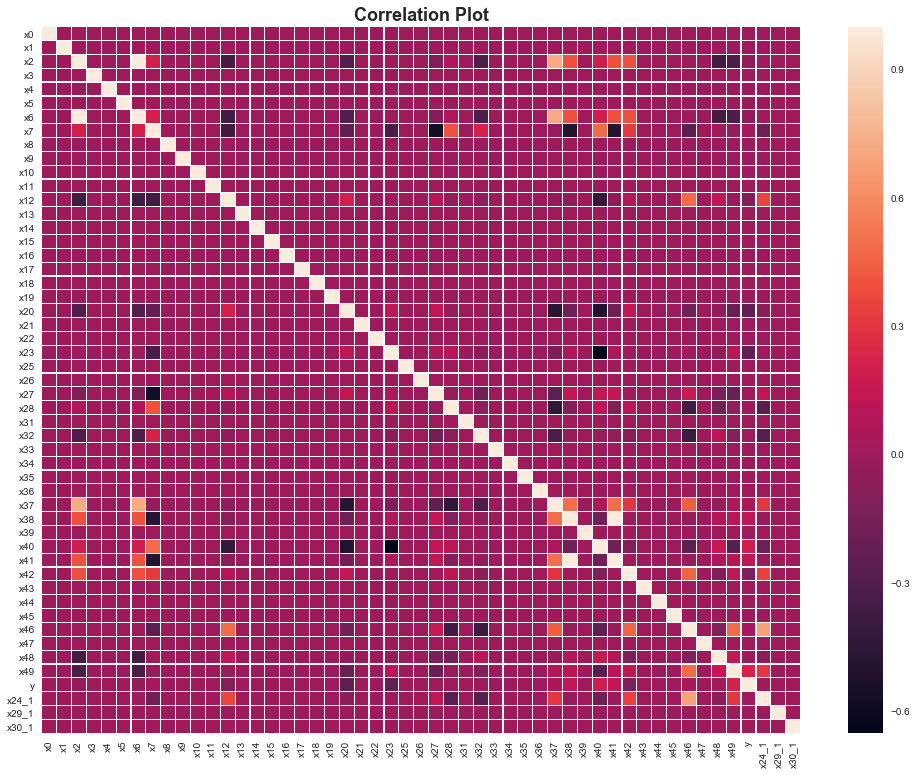

In [50]:
# Create new column for each categorical column such that this new column would have category number
# Note from John:  I added this for loop because I was getting "NotImplementedError: > 1 ndim Categorical are not supported at this time"
# with original code, which is first commented out line below.
for col in ['x24', 'x29', 'x30']:
    df_data[col] = df_data[col].astype('category')
#df_data[['x24', 'x29', 'x30']] = df_data[['x24', 'x29', 'x30']].astype('category', )

df_data[['x24_1', 'x29_1', 'x30_1']] = df_data[['x24', 'x29', 'x30']].apply(lambda x: x.cat.codes)
# We removed columns x24, x29 and x30 and included columns x24_1, x29_1 and x30_1 while finding correlation 
#   to see if the categorical data is also represented by some continuous value in any other column
correlation = df_data.drop(['x24', 'x29', 'x30'], axis=1).corr()
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(correlation, linewidths=0.2, ax=ax)
ax.set_title("Correlation Plot", fontdict= {'fontsize': 18, 'fontweight' : 'bold'})
plt.show()

Above plot shows that there exists very strong correlation between columns:
1. x2 and x6
2. x38 and x41

Before jumping into the analysis of these strongly correlated data, lets look at the top 10 correlated pairs

In [53]:
def get_redundant_pairs(df):
    '''Get diagonal and upper triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(i, df.shape[1]):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = pd.DataFrame(df.corr().unstack(), columns=['corr_value']).join(
            pd.DataFrame(df.corr().abs().unstack(), columns=['absolute_corr_value']))
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(by=['absolute_corr_value'],  ascending=False)
    au_corr['correlation_type'] = [("positive", "negative")[value] for value in au_corr.corr_value >= 0]
    au_corr.drop(['corr_value'], axis=1, inplace=True)
    au_corr = pd.DataFrame(au_corr).reset_index(drop=False)
    au_corr.columns = ['column_1', 'column_2', 'corr_value', 'corr_type']
    return au_corr

In [54]:
print("Top Absolute Correlations")
get_top_abs_correlations(df_data.drop(['x24', 'x29', 'x30'], axis=1)).head(10)

Top Absolute Correlations


,column_1,column_2,corr_value,corr_type
0,x6,x2,1.000000,negative
1,x41,x38,1.000000,negative
2,x37,x2,0.726629,negative
3,x37,x6,0.726627,negative
4,x24_1,x46,0.695891,negative
5,x40,x23,0.651918,positive
6,x27,x7,0.570490,positive
7,x40,x20,0.505065,positive
8,x41,x37,0.493519,negative
9,x38,x37,0.493457,negative


From the correlation plot and the above dataframe, we see that the column pairs (x2, x6) and (x38, x41) have a correlation of one. The third highest value of correlation is 0.7266 which we are ok with. 

#### Analysis of column pairs (x2, x6) and (x38, x41) strong correlation

The correlation between the columns that we plotted earlier is linear correlation. Correlation value of 1 means that those columns are derived from one another using function y = mx+c where m and c are some constant values.

We can solve this equation for values of m and c using just two sets of values for pair (y,x). Lets say the values are (y1, x1) and (y2, x2), then the values of m and c can be given by the equation:
<center>$m\ {=}\ {\frac{y1\ -\ y2}{x1\ -\ x2}}$    &nbsp;&nbsp;&nbsp;&nbsp;- (1) </center>
<br>
<center>$c\ {=}\ {\frac{(y2\ *\ x1)\ -\ (y1\ *\ x2)}{x1\ -\ x2}}$  &nbsp;&nbsp;&nbsp;&nbsp;- (2)</center>

In [64]:
# Solving the equations 1 and 2 above to find values of m and c for pair x2 and x6
x1 = df_data['x2'][0]
x2 = df_data['x2'][1]
y1 = df_data['x6'][0]
y2 = df_data['x6'][1]
print("Values of pairs  (y1, x1) and (y2, x2): ({}, {}) and ({}, {})".format(y1, x1, y2, x2))
m1 = (y1 - y2) / (x1 - x2)
c1 = (y2*x1 - y1*x2) / (x1 - x2)
print("Values of m and c are: {} and {}".format(m1, c1))

Values of pairs  (y1, x1) and (y2, x2): (6.718751485961568, 4.621113288578008) and (40.47705815839258, 27.839855623343226)
Values of m and c are: 1.4539248588794147 and -1.224084794112575e-15


In [65]:
# Solving the equations 1 and 2 above to find values of m and c for pair x38 and x41
x1 = df_data['x38'][0]
x2 = df_data['x38'][1]
y1 = df_data['x41'][0]
y2 = df_data['x41'][1]
print("Values of pairs  (y1, x1) and (y2, x2): ({}, {}) and ({}, {})".format(y1, x1, y2, x2))
m2 = (y1 - y2) / (x1 - x2)
c2 = (y2*x1 - y1*x2) / (x1 - x2)
print("Values of m and c are: {} and {}".format(m2, c2))

Values of pairs  (y1, x1) and (y2, x2): (-1.4971170612751283, -1.3537288660926288) and (36.292789842614, 32.816804050803015)
Values of m and c are: 1.1059209113242678 and -4.158803946594417e-16


In both the cases above, we observe that the c values are approximately zero. So might be the equation describing the relation between the two variables is of the form y = mx. Lets verify this generalization.

In [66]:
df_data[['x2','x6']].apply(lambda x: np.round(x[1]/x[0],8), axis = 1).value_counts(dropna=False)

 1.453925    159936
NaN              64
dtype: int64

In [68]:
df_data[['x38','x41']].apply(lambda x: np.round(x[1]/x[0],8), axis = 1).value_counts(dropna=False)

 1.105921    159929
NaN              71
dtype: int64

We guess that the NaN values in the above outputs are coming because of the missing data in those columns. NaN will be the outcome when either one or both of the values for the column pair (x2, x6) is missing. Similarily NaN will be the outcome when either one or both of the values for the column pair (x38, x41) is missing.
But apart from that it becomes clear that 
1. x6 value is 1.453925 times x2 value
2. x41 value is 1.105921 times x38 value

This relationship can be used to impute the missing data in these columns whenever only one of them is missing. So lets verify the number of cases when only one of the two columns in the pair have missing data. From the above outputs, we can say that for pair (x2, x6), this count cannot be greater then 64 and for pair (x38, x41), this count cannot be greater than 71.  

In [77]:
df_data[['x2','x6']].isna().sum(axis=1).value_counts()

0    159936
1        64
dtype: int64

In [90]:
df_data[['x38','x41']].isna().sum(axis=1).value_counts()

0    159929
1        71
dtype: int64

This is great. Above output shows that for both the pairs, there is not even a single instance where both the values are missing. This means that using the derived linear relationship between pairs (x2, x6) and (x38, x41), we can perform the imputation for these columns completely.

In [92]:
df_data['x6'].fillna(df_data['x2'] * 1.453925, inplace=True)
df_data['x2'].fillna(df_data['x6'] / 1.453925, inplace=True)
df_data['x41'].fillna(df_data['x38'] * 1.105921, inplace=True)
df_data['x38'].fillna(df_data['x41'] / 1.105921, inplace=True)

Since we were able to verify that x6 is derived from x2 and x41 is derived from x38, we can drop one column of the two from the pair. We are sure about this conclusion as this dataset is not a small sample (160k) records and we were not able to find a single instance which opposes this relationship.

In [94]:
df_data.drop(['x6', 'x41'], axis=1, inplace=True)

# Also drop the columns x24_1, x29_1 and x30_1 as our correlation analysis is complete and these columns are of no use now.
df_data.drop(['x24_1', 'x29_1', 'x30_1'], axis=1, inplace=True)

#### Missing data analysis

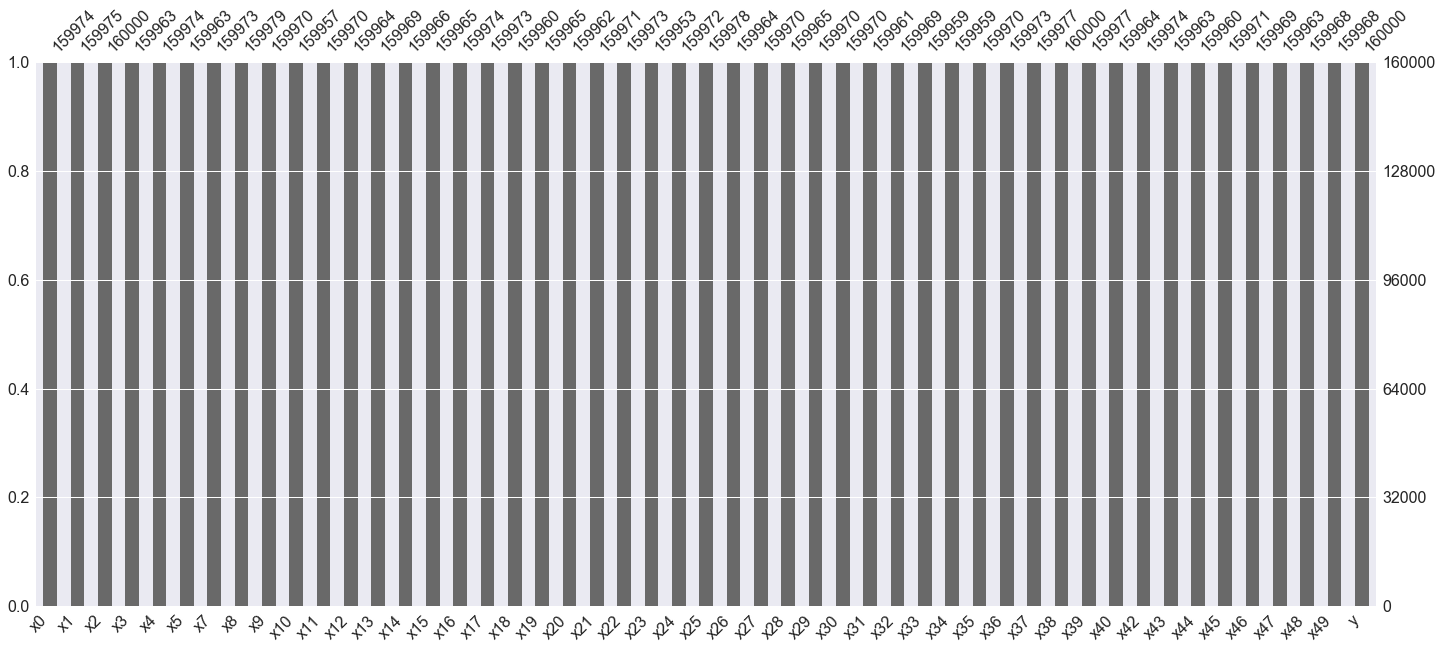

In [95]:
mno.bar(df_data)

From the above bar chart, we observe that apart from the target variable i.e. y (160,000 non-missing values equals total number of records in the dataset) and the already imputed columns (x2 and x38), all other variables have missing values (non-missing values less than 160,000). For each column, the number of missing values is very small (maximum being 47 for column x23 (160000 - 159953 = 47)).

In [98]:
print("Shape of the dataset:",df_data.shape,
    " \nShape of data with missing values", df_data[df_data.isna().sum(axis=1)>0].shape)

Shape of the dataset: (160000, 49)  
Shape of data with missing values (1473, 49)


In [100]:
df_data.isna().sum(axis=1).value_counts()

0    158527
1      1473
dtype: int64

The above output shows that out of the 160,000 records in the entire dataset, 1473 records are having missing data. Also of the 1473 records having missing data, only one value is missing in each record. This means that if this dataset is converted to a single dimension array, ti would have a total of 160000 * 49 values of which 1473 would be missing which is like 0.019% missing data.

Since for the 1473 records with missing data, only one value is missing in every record, remaining all 48 values are present. If we drop these records, that would mean that over 48 non-missing values, we are giving more importance to the one missing value. So instead of dropping these values, we decided to impute the missing values. 

#### Missing Data Imputation for continuous data
Imputed using mean value.

In [104]:
cols_to_impute = df_data.columns
# From the analysis done earlier, we know that only x24, x29 and x30 columns are categorial, remaining all are continuous
cols_to_impute = cols_to_impute.drop(['x24', 'x29', 'x30'])

df_data[cols_to_impute] = df_data[cols_to_impute].fillna(df_data[cols_to_impute].mean())

#### Missing Data Imputation for categorical data
We already have analyzed that each row in the dataset has a maximum of one missing value. Before imputation of categorical missing data, lets analyze how many values are missing for each of these columns.

In [111]:
print("Missing data count for each categorical column")
print(df_data[['x24', 'x29', 'x30']].isna().sum())
print()
print("Total Records with missing data:", df_data[['x24', 'x29', 'x30']].isna().sum(axis=1).sum())

Missing data count for each categorical column
x24    28
x29    30
x30    30
dtype: int64

Total Records with missing data: 88


This means that out of 160000 records, only 88 have missing data. For categorical columns, we performed the imputation of missing values by the most frequent category for the categorical data.

In [112]:
cols_to_impute = ['x24', 'x29', 'x30']
df_data[cols_to_impute] = df_data[cols_to_impute].fillna(df_data[cols_to_impute].mode().iloc[0])

In [113]:
# Verify that there is no more missing values in the dataset
#  If the output of the code below is 0, that would mean that there is no missing data in the dataset.
df_data.isna().sum(axis=1).sum() # gives the total number of missing values in the dataset

0

#### Categorical data analysis and one-hot encoding
We begin our analysis of categorical data with firstly looking at the distribution of target variable 'y' values. Then we looked at the distribution of target variable 'y' w.r.t. each category of the categorical column to get a sence of how important these categories will be in predicting the target variable 'y' values.

In [115]:
df_data.y.value_counts() / df_data.y.count() * 100

0    59.876875
1    40.123125
Name: y, dtype: float64

The target variable 'y' is a little unbalanced with almost 60% of the values as 0 and 40% of the values as 1 

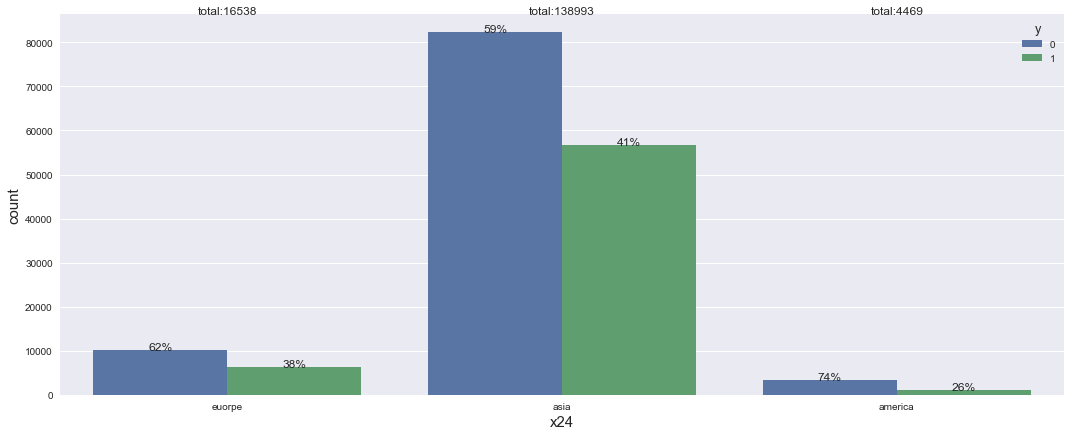

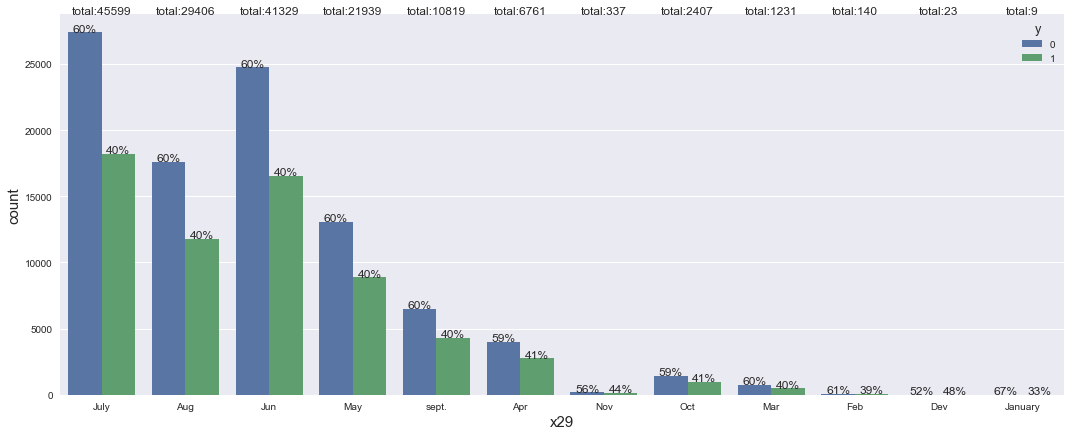

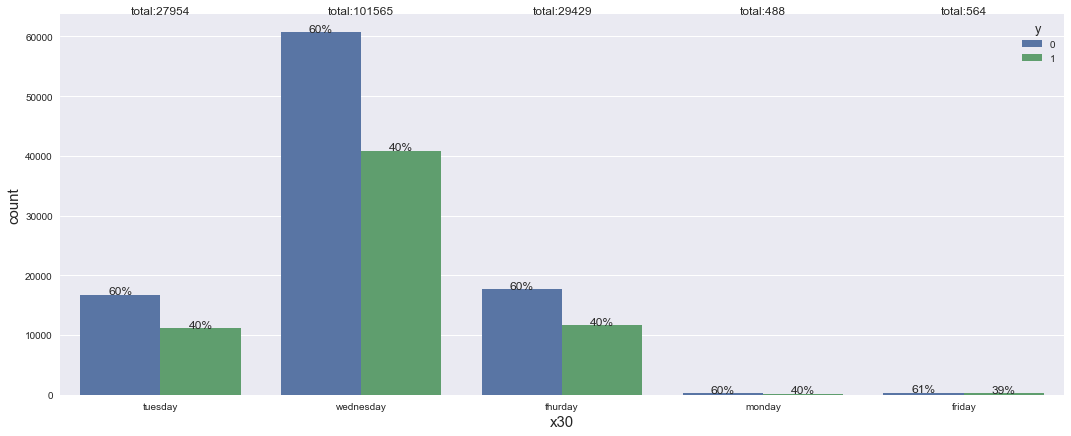

In [121]:
sns.set(style="darkgrid")
fields = ['x24','x29','x30']

for field in fields:
    
    sns.set_context(rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":15})
    ax = sns.countplot(x=field, data=df_data, hue="y", order=df_data[field].unique())
    # ax.set_ylabel('')
    
    
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    ax.figure.set_size_inches(18, 7)
    
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        
        # Display the percentage value at the top of each bar
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
        
        # Display total records in each category at the top of the graph
        ax.text(left.get_x() + left.get_width(), plt.ylim()[1], "total:" + str(total), ha="center")
        
    plt.show()

For column **x30**, the distribution of target variable within each category is almost the same as the distribution of 'y' in the entire dataset. So, we predict that x30 won't be a good feature for prediction on 'y'.
Same is the case with the column **x29** for which too, we will guess that it wont be a good feature for prediction of 'y'.

For **x24**, for the category 'america', the distribution of 'y' is 74:26 and when we compare this to the distrubution of 'y' which is 60:40, the column x24 may appear to be showing a little importance in predicting the value of 'y' but then since 'america' category is only 4469 records of the 160k records and the remaining categories ('europe' and 'asia') have the same 60:40 distribution as of the entire data, we guess that this feature will also be not that important in prediction of 'y'.


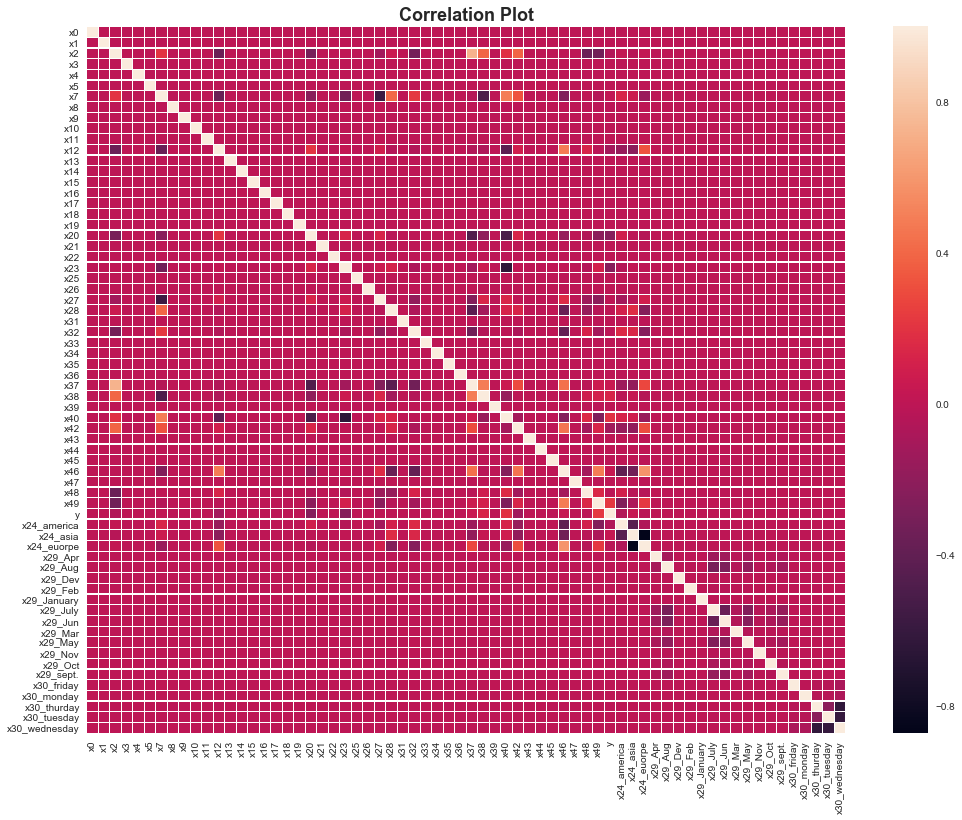

Top Absolute Correlations


,column_1,column_2,corr_value,corr_type
0,x24_euorpe,x24_asia,0.873348,positive
1,x37,x2,0.726610,negative
2,x40,x23,0.651744,positive
3,x30_wednesday,x30_thurday,0.625893,positive
4,x30_wednesday,x30_tuesday,0.606589,positive
5,x24_euorpe,x46,0.589500,negative
6,x27,x7,0.570385,positive
7,x40,x20,0.504959,positive
8,x38,x37,0.493474,negative
9,x40,x7,0.489332,negative


In [122]:
df_data_oneHot = pd.get_dummies(df_data)
correlation = df_data_oneHot.corr()
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(correlation, linewidths=0.2, ax=ax)
ax.set_title("Correlation Plot", fontdict= {'fontsize': 18, 'fontweight' : 'bold'})
plt.show()

print("Top Absolute Correlations")
get_top_abs_correlations(df_data_oneHot).head(10)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_pred, y_true)
    cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap, )
    title = title + " - Overall accuracy:" + str(np.round(accuracy_score(y_true, y_pred),3))
    plt.title(title)
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm[i,j]) + "\n" + format(cm1[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    print()
    print("Detailed classification report:")
    print(classification_report(y_true, y_pred))
    
    print()
    
    # As a business owner, False Negatives costs $10,000 each and false positive costs $50
    print("Cost to business due to incorrect model predictions: ${:,.2f}".format(cm[1][0] * 10000 + cm[0][1] * 50))

#### Test Train split

In [138]:
from sklearn.model_selection import train_test_split
X = df_data_oneHot.drop(['y'], axis=1)
y = df_data_oneHot['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1234)
print("Shape of train input features:", x_train.shape)
print("Shape of test input features:", x_test.shape)

Shape of train input features: (144000, 65)
Shape of test input features: (16000, 65)


In [139]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression as lr

Train data accuracy: 0.703

Detailed classification report:
             precision    recall  f1-score   support

          0       0.72      0.82      0.77      9538
          1       0.67      0.52      0.58      6462

avg / total       0.70      0.70      0.69     16000


Cost to business due to incorrect model predictions: $17,094,750.00


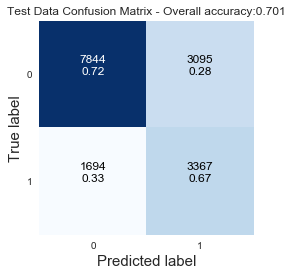

In [140]:
lr_model = lr()
lr_model.fit(x_train, y_train)
y_train_pred = lr_model.predict(x_train)
y_pred = lr_model.predict(x_test)
print("Train data accuracy:", str(np.round(accuracy_score(y_train, y_train_pred),3)))
plot_confusion_matrix(y_test, y_pred, ['0','1'], title="Test Data Confusion Matrix")

# Tuning hyper-parameters for accuracy

# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}

Grid scores on development set:

0.709 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}
0.703 (+/-0.002) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 1}
0.706 (+/-0.004) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 0.1}
0.703 (+/-0.002) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 1}
0.703 (+/-0.002) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 0.01}
0.703 (+/-0.002) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 0.1}
0.703 (+/-0.002) for {'solver

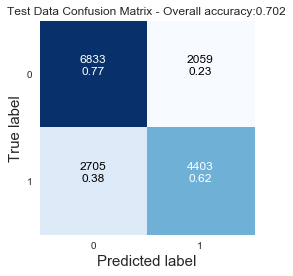

Best parameters set found on development set:

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}

Grid scores on development set:

0.693 (+/-0.003) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 1}
0.693 (+/-0.003) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 0.01}
0.693 (+/-0.003) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 0.001}
0.699 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.1}
0.699 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 1}
0.699 (+/-0.005) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.01}
0.700 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}
0.699 (+/-0.003) for {'sol

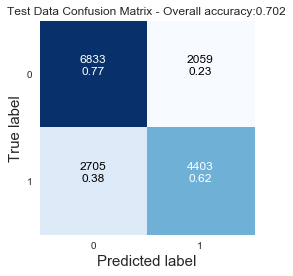

Best parameters set found on development set:

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 0.01}

Grid scores on development set:

0.672 (+/-0.002) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 0.01}
0.704 (+/-0.005) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1}
0.705 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}
0.673 (+/-0.003) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 0.001}
0.704 (+/-0.005) for {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1}
0.682 (+/-0.007) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 0.001}
0.705 (+/-0.003) for {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 0.01}
0.673 (+/-0.003) for {'solver': '

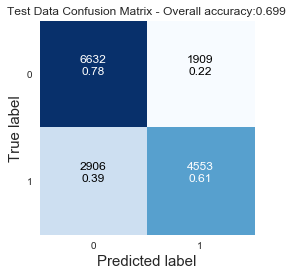

In [146]:
tuned_parameters={ 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1]
              ,'class_weight': ['balanced', None]
              ,'solver': ['liblinear', 'lbfgs']
              ,'max_iter':[100,500]
             }
scores = ['accuracy','precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    if score == 'accuracy':
        model01 = RandomizedSearchCV(lr(), tuned_parameters, cv=5,
                       scoring='%s' % score,n_iter=10)
        model01.fit(x_train, y_train)
    elif score == 'precision':
        model02 = RandomizedSearchCV(lr(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score,n_iter=10)
        model02.fit(x_train, y_train)
    else:
        model03 = RandomizedSearchCV(lr(), tuned_parameters, cv=5,
                                     scoring='%s_macro' % score,n_iter=10)
        model03.fit(x_train, y_train)
    
for model in [model01, model02, model03]:
    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    plot_confusion_matrix(y_test, model.best_estimator_.predict(x_test), ['0','1'], title="Test Data Confusion Matrix")
    plt.show()

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_estimators': 50, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}

Grid scores on development set:

0.697 (+/-0.008) for {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini'}
0.845 (+/-0.005) for {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 10, 'criterion': 'gini'}
0.847 (+/-0.006) for {'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
0.687 (+/-0.014) for {'n_estimators': 40, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}
0.894 (+/-0.006) for {'n_estimators': 50, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}
0.695 (+/-0.008) for {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini'}
0.688 (+/-0.009) for {'n_estimators': 40, 'min_samples_split': 9, 'max_depth': 5, 'criterion': 'gini'}
0.841 (+/-0.011) for {'n_estimators': 40, 'min_samples_spli

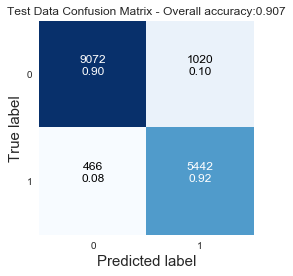

In [147]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters={'n_estimators':[40,50,100,1000], 'criterion':['gini','entropy'], 'max_depth':[5,10,15],
                 'min_samples_split':[2,4,9]}

#tuned_parameters={'n_estimators':[50,100,1000], 'criterion':['gini','entropy'], 'max_depth':[5,10,15],
#                 'min_samples_split':[2,5,10], 'random_state':[1], 'oob_score':[True, False], 'min_samples_leaf':[0.01]}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
#     if score == 'accuracy':
#         clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
#                        scoring='%s' % score,n_iter=10)
#     else:
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                             scoring='%s_macro' % score,n_iter=10)
            
            
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    plot_confusion_matrix(y_test, clf.predict(x_test), ['0','1'], title="Test Data Confusion Matrix")
    plt.show()

In [149]:
from sklearn.preprocessing import MinMaxScaler


columns = X.columns
sc = MinMaxScaler(feature_range=(0, 1))

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [153]:
modelFI = clf.best_estimator_

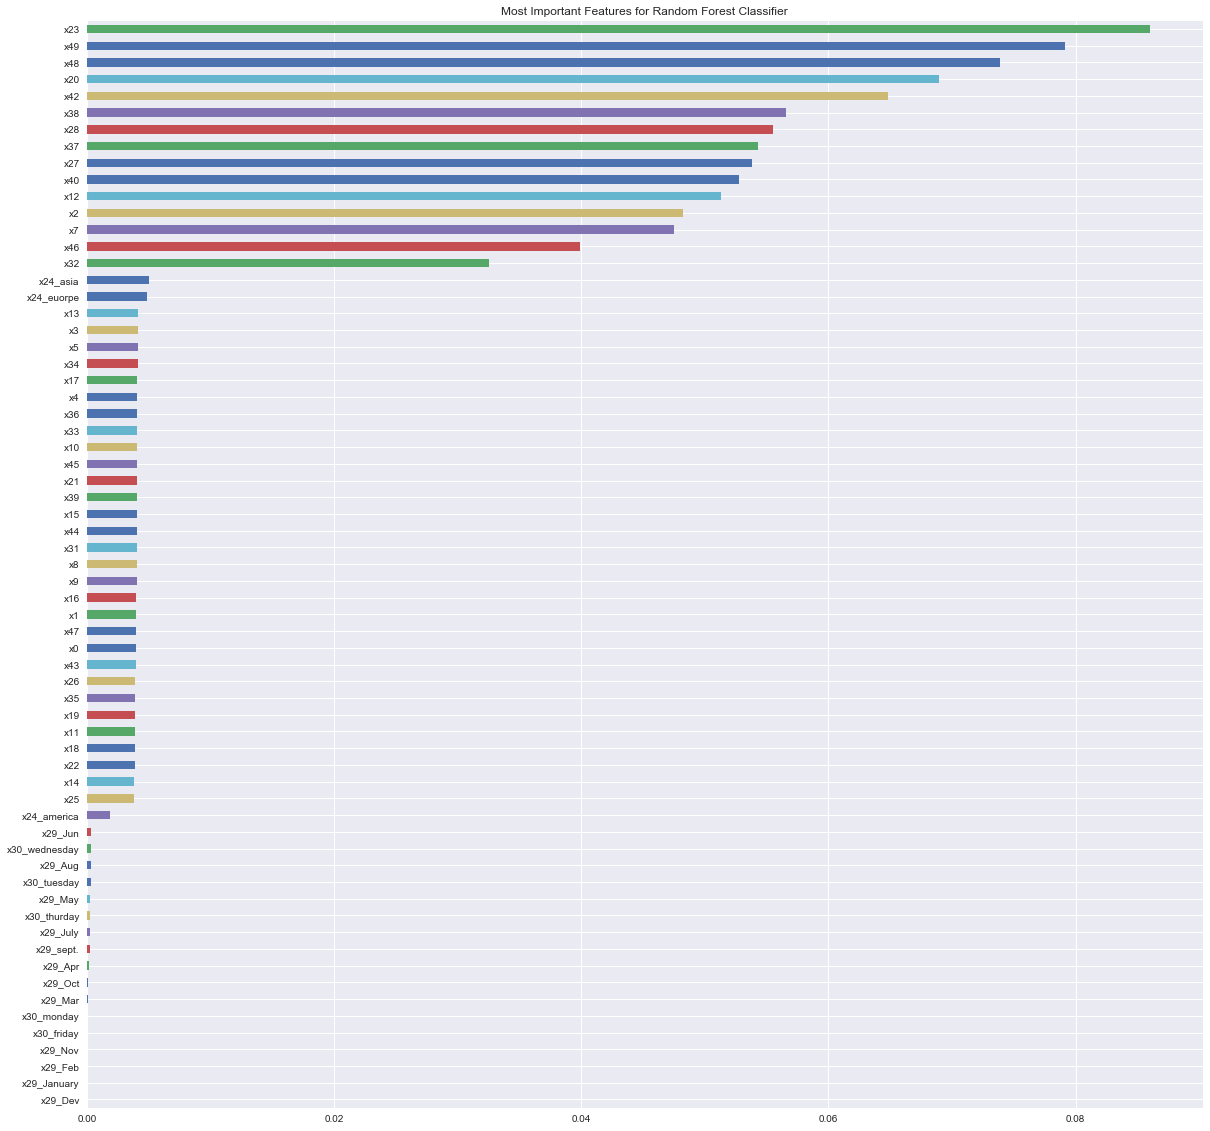

In [155]:
feature_importances = pd.Series(modelFI.feature_importances_, index=columns)
feature_importances.sort_values().plot(kind="barh", figsize=(20,20),
                                       title = "Most Important Features for Random Forest Classifier");

In [156]:
x_test_reduced = x_test.drop(feature_importances.sort_values()[:50].index, axis=1)
x_train_reduced = x_train.drop(feature_importances.sort_values()[:50].index, axis=1)
df_data_oneHot_reduced = df_data_oneHot.drop(feature_importances.sort_values()[:50].index, axis=1)


Detailed classification report:
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      9538
          1       0.93      0.88      0.91      6462

avg / total       0.93      0.93      0.93     16000


Cost to business due to incorrect model predictions: $4,198,450.00


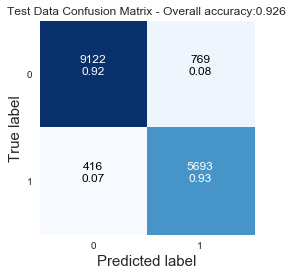

In [157]:
# Use top 15 features to train the RandomForestModel model
modelFI.fit(x_train_reduced, y_train)
plot_confusion_matrix(y_test,modelFI.predict(x_test_reduced), ['0','1'], title="Test Data Confusion Matrix")
plt.show()    

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_estimators': 55, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'entropy'}

Grid scores on development set:

0.929 (+/-0.005) for {'n_estimators': 50, 'min_samples_split': 9, 'max_depth': 20, 'criterion': 'gini'}
0.930 (+/-0.004) for {'n_estimators': 50, 'min_samples_split': 9, 'max_depth': 20, 'criterion': 'entropy'}
0.919 (+/-0.004) for {'n_estimators': 55, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}
0.933 (+/-0.004) for {'n_estimators': 55, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'entropy'}
0.929 (+/-0.004) for {'n_estimators': 55, 'min_samples_split': 9, 'max_depth': 20, 'criterion': 'gini'}
0.919 (+/-0.004) for {'n_estimators': 45, 'min_samples_split': 4, 'max_depth': 15, 'criterion': 'gini'}
0.921 (+/-0.004) for {'n_estimators': 55, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy'}
0.930 (+/-0.005) for {'n_estimators': 50, 'min_samples_spl

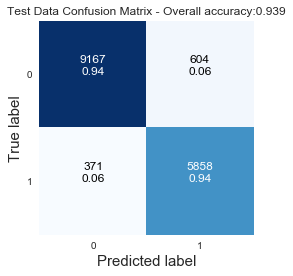

In [158]:
tuned_parameters={'n_estimators':[40,45,50,55], 'criterion':['gini','entropy'], 'max_depth':[10,15,20],
                 'min_samples_split':[2,4,9]}

scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                             scoring='%s_macro' % score,n_iter=10)
            
            
    clf.fit(x_train_reduced, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    plot_confusion_matrix(y_test, clf.predict(x_test_reduced), ['0','1'], title="Test Data Confusion Matrix")
    plt.show()


Detailed classification report:
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      9538
          1       0.94      0.91      0.92      6462

avg / total       0.94      0.94      0.94     16000


Cost to business due to incorrect model predictions: $3,989,300.00


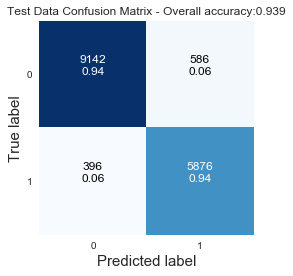

In [159]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=4, test_size=0.10, random_state=1234)

# Create a regression estimator with best parameters for cross validation
classifierEst = clf.best_estimator_

rfecv = RFECV(estimator=classifierEst, step=1, cv=cv, scoring='recall')
rfecv.fit(x_train, y_train)

plot_confusion_matrix(y_test, rfecv.predict(x_test), ['0','1'], title="Test Data Confusion Matrix")
plt.show()

Optimal number of features : 15


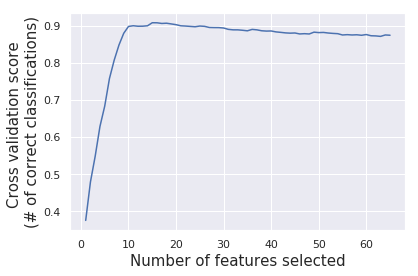

In [160]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n(# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Detailed classification report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      9538
          1       0.94      0.89      0.91      6462

avg / total       0.93      0.93      0.93     16000


Cost to business due to incorrect model predictions: $3,566,750.00


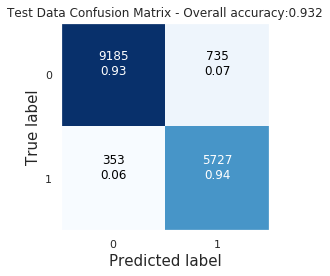

In [161]:
classifier_ada_1 =  AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators= 55, 
                    min_samples_split = 2, max_depth = 20, criterion= 'entropy'))
classifier_ada_1.fit(x_train, y_train)
plot_confusion_matrix(y_test, classifier_ada_1.predict(x_test), ['0','1'], 
                      title="Test Data Confusion Matrix")

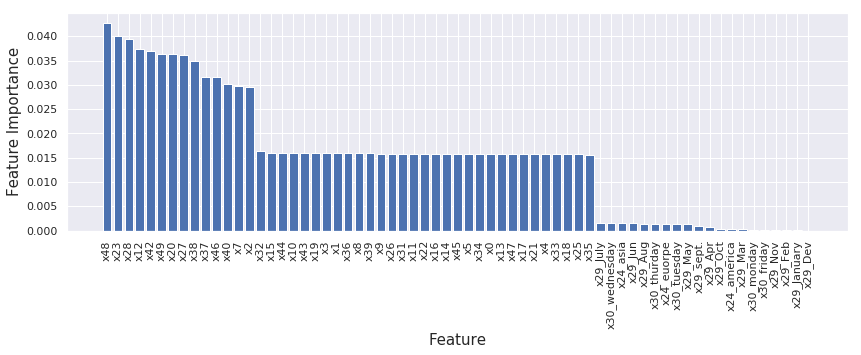

In [162]:
df_feature_imp = pd.DataFrame([df_data_oneHot.drop('y', axis=1).columns]).T
df_feature_imp.columns = ['feature']
df_feature_imp['importance'] = classifier_ada_1.feature_importances_
df_feature_imp.sort_values(by=['importance'], inplace=True, ascending=False)
plt.figure(figsize=(14,4))
plt.bar(x=df_feature_imp.feature, height=df_feature_imp.importance)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [163]:
df_result = pd.DataFrame([df_data_oneHot.drop('y', axis=1).columns]).T
df_result.columns = ['feature']
df_result['feature_ranking'] = rfecv.ranking_
df_result['feature_selected'] = rfecv.get_support()
df_result['cv_score'] = rfecv.grid_scores_
df_result.sort_values(by=['feature_ranking', 'feature'], inplace=True)
df_result.head()

,feature,feature_ranking,feature_selected,cv_score
11,x12,1,True,0.899033
2,x2,1,True,0.548762
19,x20,1,True,0.903253
22,x23,1,True,0.898561
25,x27,1,True,0.898735


In [164]:
feature = df_result[df_result.feature_ranking==1]['feature']
X_reduced = df_data_oneHot[feature]
y_reduced = df_data_oneHot['y']
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, 
            test_size = 0.1, random_state=1234)
print("Shape of train input features:", x_train_reduced.shape)
print("Shape of test input features:", x_test_reduced.shape)

Shape of train input features: (144000, 15)
Shape of test input features: (16000, 15)



Detailed classification report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      9538
          1       0.95      0.92      0.94      6462

avg / total       0.95      0.95      0.95     16000


Cost to business due to incorrect model predictions: $3,135,300.00


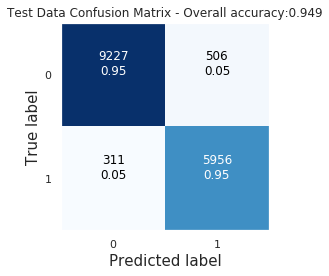

In [165]:
classifier_ada_2 =  AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators= 55, 
                    min_samples_split = 2, max_depth = 20, criterion= 'entropy'))
classifier_ada_2.fit(x_train_reduced, y_train_reduced)
plot_confusion_matrix(y_test_reduced, classifier_ada_2.predict(x_test_reduced), ['0','1'], 
                      title="Test Data Confusion Matrix")

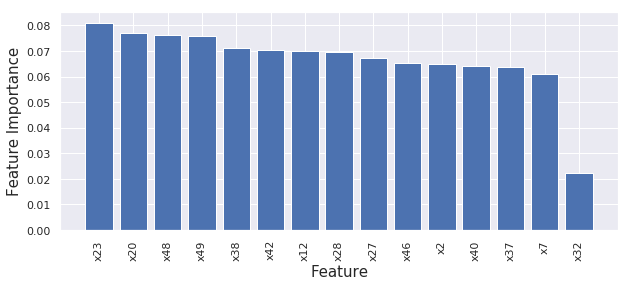

In [167]:
df_feature_imp = pd.DataFrame(feature)
df_feature_imp['importance'] = classifier_ada_2.feature_importances_
df_feature_imp.sort_values(by=['importance'], inplace=True, ascending=False)
plt.figure(figsize=(10,4))
plt.bar(x=df_feature_imp.feature, height=df_feature_imp.importance)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [168]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_ada_2, x_train_reduced, y_train_reduced, cv=3, n_jobs=3)
scores

array([ 0.94429167,  0.9434375 ,  0.94739583])

In [169]:
classifier_ada_2

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)